In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt

In [2]:
import pickle
import numpy as np

In [3]:
fname = "../../dev/imu/imu-rpi.2019-05-04-20:47:18.445193.pickle.bag"
with open(fname, 'rb') as fd:
    data = pickle.load(fd)

In [33]:
accel = data['accel']
mag = data['mag']
gyro = data['gyro']

In [25]:
def plot(num, data, title):
    s = data[0][1]
    x = [x[0][num] for x in data]
    sdev = np.std(x)
    plt.plot([x[1]-s for x in data], x)
    plt.title(title + " std: {}".format(sdev))
    plt.grid(True);

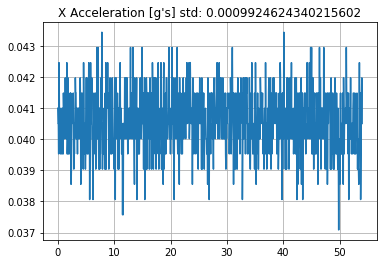

In [22]:
plot(0, accel, "X Acceleration [g's]")

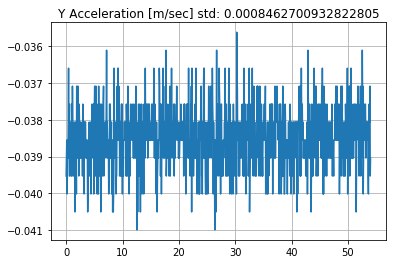

In [23]:
plot(1, accel, "Y Acceleration [m/sec]")

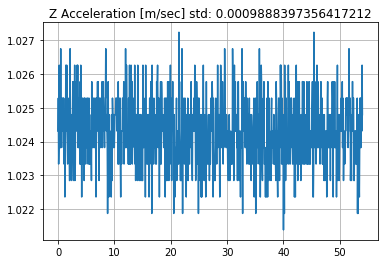

In [24]:
plot(2, accel, "Z Acceleration [m/sec]")

In [75]:
def hist(data):
    m = []
    sd = []
    for i in range(3):
        x = [x[0][i] for x in data]
        sd.append(np.std(x))
        m.append(np.mean(x))
        ax = ['x', 'y', 'z']
        plt.subplot(1,3,i+1)
        plt.hist(x, 10, density=True)
        plt.grid(True)
        plt.title(ax[i] + "-axis\n Mean {:.3f}\n Std {:.3f}".format(m[i], sd[i]));
    return (m,sd,)

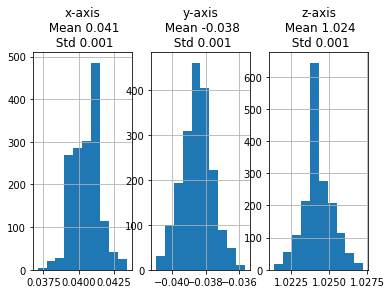

In [77]:
am, astd = hist(accel)

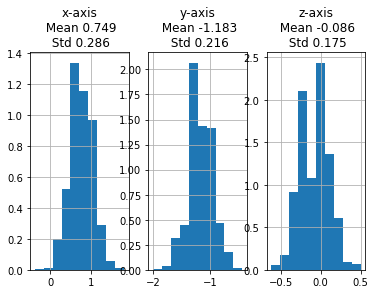

In [78]:
gm, gstd = hist(gyro)

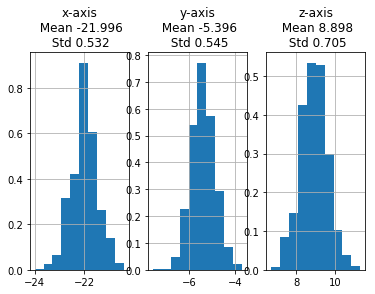

In [79]:
mm, mstd = hist(mag)